## Problem Statement
- The data is related with direct marketing campaigns (phone calls) of a banking institution. 
- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
- The classification goal is to predict if the client will subscribe a term deposit (variable response).

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Reading and Understanding the Data
- Let's start with the following steps:
- Importing data using the pandas library Understanding the structure of the data



In [2]:
bank = pd.read_csv('bankmarketing.csv',sep=',')
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.shape

(45211, 19)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [5]:
bank.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Step 2 : Data Cleaning and Preparation

In [6]:
bank.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
# check missing values for each column 
bank.isnull().sum().sort_values(ascending=False)

response     0
housing      0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
loan         0
poutcome     0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
age          0
dtype: int64

In [8]:
# check missing values for each row
bank[bank.isnull().any(axis=1)].head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


- There is no missing value in this dataset. 
- Nevertheless, there are values like “unknown”, “others”, such values should be updated as meaningful values from the dataset.

In [9]:
# Update the rows of column 'poutcome' contains 'unknown' to 'Future'
bank.loc[(bank.poutcome == 'unknown'),'poutcome']='Future'
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,Future,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,Future,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,Future,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,Future,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,Future,no


In [10]:
# Update the rows which column 'poutcome' contains 'others' to 'Disconnected'
bank.loc[(bank.poutcome == 'others'),'poutcome']='Disconnected'
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,Future,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,Future,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,Future,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,Future,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,Future,no


In [11]:
#Checking for duplicates
bank.loc[bank.duplicated()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [12]:
# Remove Negative Values in Balance Column
bank_new= bank[bank.balance > 0]

In [13]:
bank_new.describe().round(2)

,age,salary,balance,day,duration,campaign,pdays,previous
count,37931.00,37931.00,37931.00,37931.00,37931.00,37931.00,37931.00,37931.00
mean,40.99,57007.33,1655.27,15.70,259.88,2.72,41.98,0.62
std,10.76,32192.43,3240.13,8.28,259.24,2.99,101.58,2.42
min,18.00,0.00,1.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,20000.00,226.50,8.00,104.00,1.00,-1.00,0.00
50%,39.00,60000.00,644.00,16.00,181.00,2.00,-1.00,0.00
75%,49.00,70000.00,1776.00,21.00,322.00,3.00,-1.00,0.00
max,95.00,120000.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [14]:
#Removing Outliers from Balance Column

bank_new['balance'].quantile(0.999)


36223.17000000022

In [15]:
bank_new[bank_new.balance <= 36223]


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,Future,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,Future,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,Future,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,Future,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,Future,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,Future,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,Future,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,Future,no


In [16]:
bank_new.shape

(37931, 19)

In [17]:
# Co- relation between all columns
bank_new.corr()

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.018295,0.105145,-0.012119,-0.006069,0.009549,-0.025504,0.000979
salary,0.018295,1.000000,0.062056,0.023281,-0.008966,0.011088,-0.011318,0.017406
balance,0.105145,0.062056,1.000000,0.013305,0.020227,-0.008621,-0.005947,0.009652
day,-0.012119,0.023281,0.013305,1.000000,-0.027492,0.150999,-0.083281,-0.047052
duration,-0.006069,-0.008966,0.020227,-0.027492,1.000000,-0.081182,-0.003449,0.000417
campaign,0.009549,0.011088,-0.008621,0.150999,-0.081182,1.000000,-0.089618,-0.032967
pdays,-0.025504,-0.011318,-0.005947,-0.083281,-0.003449,-0.089618,1.000000,0.441343
previous,0.000979,0.017406,0.009652,-0.047052,0.000417,-0.032967,0.441343,1.000000


In [18]:
bank_new['pdays'].median()

-1.0

In [19]:
bank_new['pdays'].describe()

count    37931.000000
mean        41.976510
std        101.584743
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [20]:
# Update the rows which column 'pdays' contains '-1' to '999'
bank_new.loc[(bank_new.pdays == -1),'pdays']= 999
bank_new.head()

C:\Users\shankar.g\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,999,0,Future,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,999,0,Future,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,999,0,Future,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,999,0,Future,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,999,0,Future,no


In [21]:
bank_new['pdays'].median()

999.0

In [22]:
bank_new['pdays'].describe()

count    37931.000000
mean       848.994516
std        310.959879
min          1.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [23]:
# Drop column "contact" which is useless
bank_new.drop(['contact'],axis=1,inplace=True)
bank_new.head()

C:\Users\shankar.g\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,may,261,1,999,0,Future,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,may,151,1,999,0,Future,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,may,76,1,999,0,Future,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,5,may,92,1,999,0,Future,no
4,33,unknown,0,single,unknown,no,no,1,no,no,5,may,198,1,999,0,Future,no


In [24]:
# Change the unit of 'duration' from seconds to minutes
bank_new['duration'] = bank_new['duration'].apply(lambda n:n/60).round(2)
bank_new.head()

<ipython-input-24-065c33eec9da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_new['duration'] = bank_new['duration'].apply(lambda n:n/60).round(2)


,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,may,4.35,1,999,0,Future,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,may,2.52,1,999,0,Future,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,may,1.27,1,999,0,Future,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,5,may,1.53,1,999,0,Future,no
4,33,unknown,0,single,unknown,no,no,1,no,no,5,may,3.30,1,999,0,Future,no


In [29]:
# Change 'month' from words to numbers for easier analysis
bank_new.loc[(bank_new.month == "jan"),'month']= 1
bank_new.loc[(bank_new.month == "feb"),'month']= 2
bank_new.loc[(bank_new.month == "mar"),'month']= 3
bank_new.loc[(bank_new.month == "apr"),'month']= 4
bank_new.loc[(bank_new.month == "may"),'month']= 5
bank_new.loc[(bank_new.month == "jun"),'month']= 6
bank_new.loc[(bank_new.month == "jul"),'month']= 7
bank_new.loc[(bank_new.month == "aug"),'month']= 8
bank_new.loc[(bank_new.month == "sep"),'month']= 9
bank_new.loc[(bank_new.month == "oct"),'month']= 10
bank_new.loc[(bank_new.month == "nov"),'month']= 11
bank_new.loc[(bank_new.month == "dec"),'month']= 12
bank_new.head()

C:\Users\shankar.g\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,5,4.35,1,999,0,Future,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,5,2.52,1,999,0,Future,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,5,1.27,1,999,0,Future,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,5,5,1.53,1,999,0,Future,no
4,33,unknown,0,single,unknown,no,no,1,no,no,5,5,3.30,1,999,0,Future,no


In [36]:
# Update the rows which column 'education' contains 'unknown' to 'uneducated'
bank_new.loc[(bank.education == 'unknown'),'education']='uneducated'
bank_new.head()

C:\Users\shankar.g\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,5,4.35,1,999,0,Future,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,5,2.52,1,999,0,Future,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,5,1.27,1,999,0,Future,no
3,47,blue-collar,20000,married,uneducated,no,no,1506,yes,no,5,5,1.53,1,999,0,Future,no
4,33,unknown,0,single,uneducated,no,no,1,no,no,5,5,3.30,1,999,0,Future,no


##  Step 3: Visualizing the data

AxesSubplot(0.125,0.125;0.775x0.755)


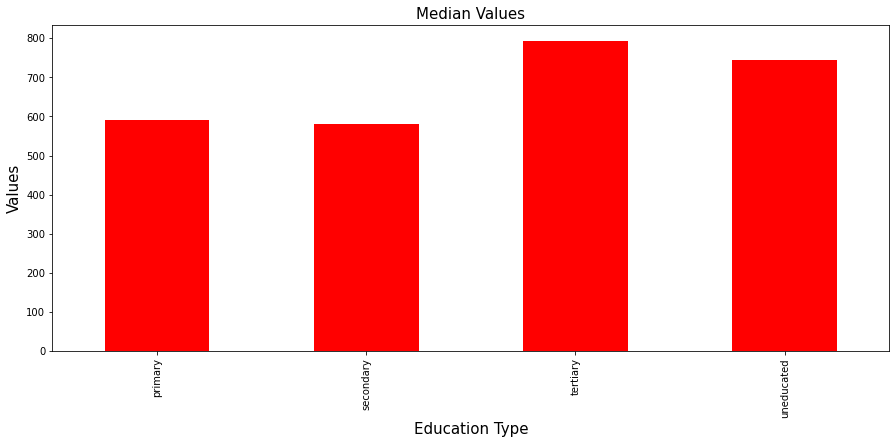

In [37]:
v = bank_new.groupby('education')['balance'].median().plot(kind='bar',color='red',figsize=(15,6))
v.set_xlabel('Education Type',fontsize=15)
v.set_ylabel('Values',fontsize=15)
v.set_title('Median Values',fontsize=15)
print(v)

## Inference

- Tertiary Education type has the highest Median values
- Secondary Education type has the lowest Median values

Text(0.5, 1.0, 'Boxplot for pdays')

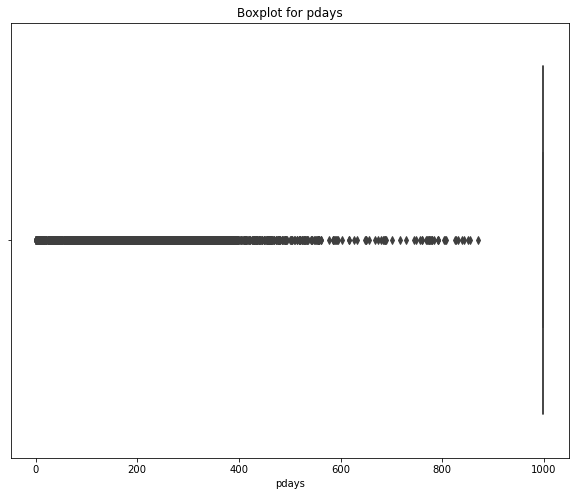

In [38]:
plt.subplots(figsize=(10,8))
sns.boxplot(bank_new.pdays)
plt.xlabel('pdays')
plt.title('Boxplot for pdays')

## Inference

- I can see outliers are present in this data and datapoint is 999.

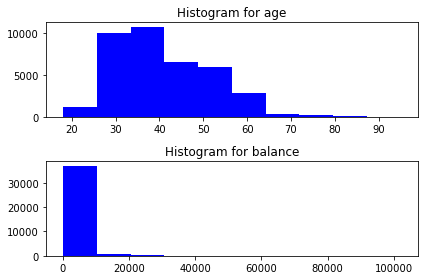

In [44]:
# distribution of 'age' and 'balance'
plt.subplot(2,1,1)
plt.title("Histogram for age")
plt.hist(bank_new['age'],color='blue',histtype='stepfilled',orientation='vertical')
plt.subplot(2,1,2)
plt.title("Histogram for balance")
plt.hist(bank_new['balance'],color='blue')
plt.tight_layout()

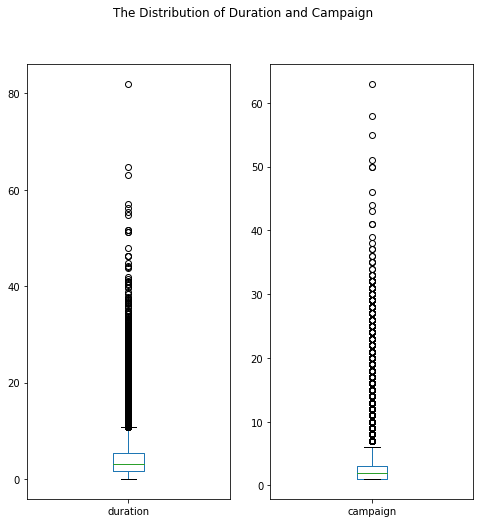

In [45]:
# distribution of 'age' and 'balance'
bank_new[['duration','campaign']].plot(kind = 'box',figsize = (8,8),subplots = True, layout = (1,2),sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

## Inference
- The distribution of duration: As observed from the box plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

- The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 60+ times, which is not normal. These clients may have some special needs that require frequent contact.

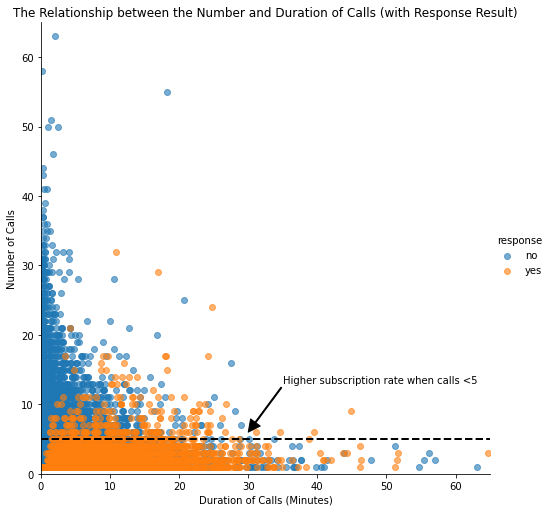

In [46]:
# Visualize the relationship between 'duration' & 'campaign': with response
dur_cam = sns.lmplot(x='duration', y='campaign',data = bank_new,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

## Inference
- clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".
- As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. 
- Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. 
- More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high.  - Most “yes” clients were approached by less than 10 times.

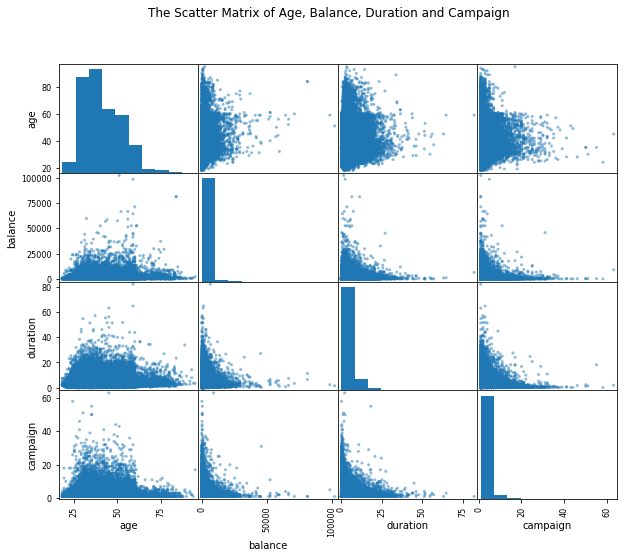

In [47]:
# Scatter matrix and Correlation matrix
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(bank_new[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

## Inference
- The scatter matrix does not reveal any clear relationship among age, balance, duration and campaign.

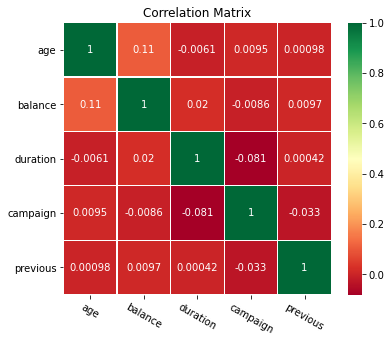

In [48]:
#Correlation using heatmap
corr_data = bank_new[['age','balance','duration','campaign','month','previous','response']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

## Inference
- Correlation matrix was plotted with all qualitative variables. 
- Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”.

In [58]:
# Visualize the subscription and contact rate by age
bank_new.loc[(bank_new.age < 30),'age']= 20
bank_new.loc[(bank_new.age  >= 30) & (bank_new.age  <= 39) ,'age']= 30
bank_new.loc[(bank_new.age  >= 40) & (bank_new.age  <= 49) ,'age']= 40
bank_new.loc[(bank_new.age  >= 50) & (bank_new.age  <= 59) ,'age']= 50
bank_new.loc[(bank_new.age >= 60),'age']= 60
bank_new.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,age_group
0,50,management,100000,married,tertiary,yes,no,2143,yes,no,5,5,4.35,1,999,0,Future,no,50.0
1,40,technician,60000,single,secondary,yes,no,29,yes,no,5,5,2.52,1,999,0,Future,no,40.0
2,30,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,5,1.27,1,999,0,Future,no,30.0
3,40,blue-collar,20000,married,uneducated,no,no,1506,yes,no,5,5,1.53,1,999,0,Future,no,40.0
4,30,unknown,0,single,uneducated,no,no,1,no,no,5,5,3.30,1,999,0,Future,no,30.0


In [59]:
count_age_response_pct = pd.crosstab(bank_new['response'],bank_new['age']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

In [60]:
age = pd.DataFrame(bank_new['age'].value_counts())
age['% Contacted'] = age['age']*100/age['age'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

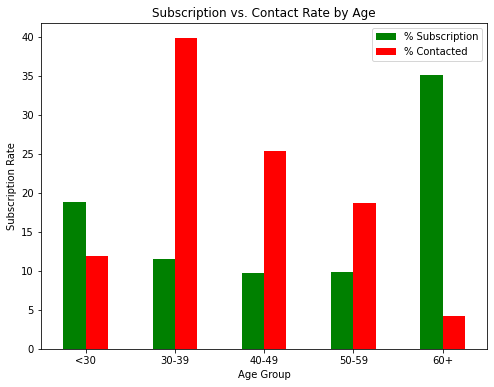

In [63]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

## Inference
Green vertical bars indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

- It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest.
- The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.

In [98]:
#  Visualize the subscription rate by job
count_job_response_pct = pd.crosstab(bank_new['response'],bank_new['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

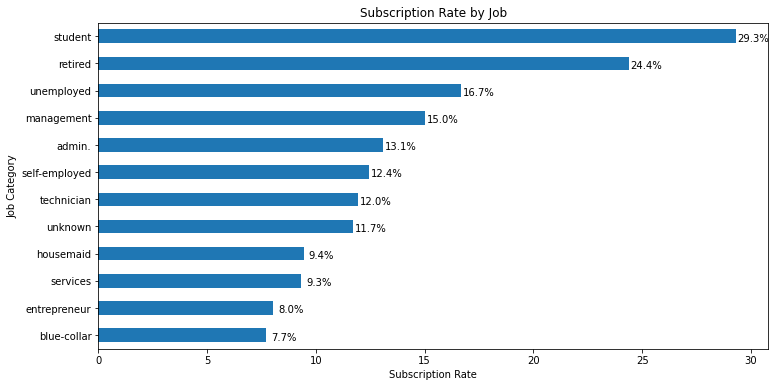

In [99]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')


## Inference

- As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

In [101]:
# Visualize the subscription and contact rate by month
count_month_response_pct = pd.crosstab(bank_new['response'],bank_new['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [104]:
month = pd.DataFrame(bank_new['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

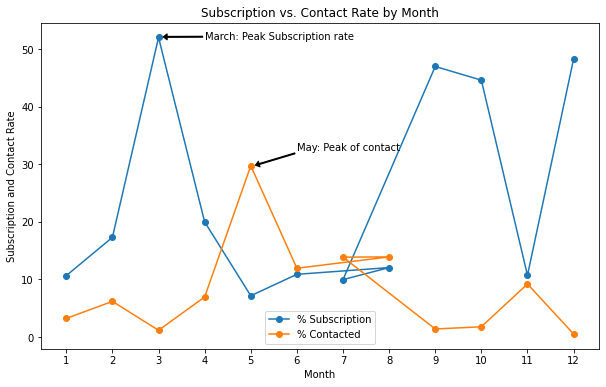

In [105]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')
plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

## Inference

- The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.
- However, the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.

## Prepare Data for Classification

- Only the most relevant customer information is considered, which includes job title, education,balance, default record, housing record and loan record.
- Other information can be ignored as it is not directly related to customers themselves.

In [187]:
bank_new.drop(['marital'],axis=1, inplace=True)
bank_new1= bank_new.iloc[:, 0:7]

## Tranform categorical data into dummy variables
- Since machine learning algorithms only take numerical values, all five categorical variables (job, education, default, housing and loan) are transformed into dummy variables.

- Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represent different types rather than levels, so dummy variables are ideal to distinguish the effect of different categories

In [238]:
bank_new = pd.get_dummies(bank, columns = ['job'])
bank_new = pd.get_dummies(bank_new, columns = ['education'])
bank_new['housing'] = bank_new['housing'].map({'yes': 1, 'no': 0})
bank_new['default'] = bank_new['default'].map({'yes': 1, 'no': 0})
bank_new['loan'] = bank_new['loan'].map({'yes': 1, 'no': 0})
bank_new['targeted'] = bank_new['targeted'].map({'yes': 1, 'no': 0})
bank_new['response'] = bank_new['response'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(bank['response'])
bank_new = pd.merge(bank_new1,dataset_response, left_index = True, right_index = True)

In [241]:
# Feature Selection
array = bank_new.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response'
Y = array[:,-1]

In [242]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [243]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

## Building Model

In [244]:
from sklearn.linear_model import LogisticRegression
models = []
models.append(('LR', LogisticRegression()))

In [246]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\shankar.g\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR: 0.881664 (0.005030)


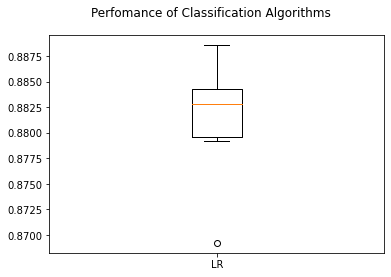

In [247]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

In [250]:
# Test LR model on the test set
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [249]:
# Evalute LR Model
predictions = LR.predict(X_test)

In [251]:
# Accuracy Score 
print(accuracy_score(Y_test, predictions))

0.8875373216852814


- Accuracy score is the percentage of correct predictions out of all predictions made. 
- The LR algorithm achieves an accuracy of 89.08%

[[8026    1]
 [1016    0]]


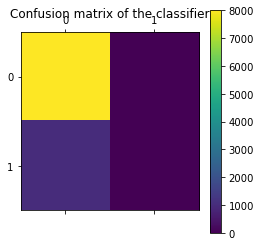

In [252]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [253]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      8027
         yes       0.00      0.00      0.00      1016

    accuracy                           0.89      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.79      0.89      0.83      9043



Classification report shows the precision, recall, F1 and support scores for the LR classification model.

- Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 89%.
- Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 100% correctly that they would decline the offer.

## Random Forest

In [256]:
# Test LR model on the test set
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=20,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)
rfm.fit(X_train,Y_train)

C:\Users\shankar.g\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\shankar.g\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(max_features=None, min_samples_leaf=10, n_estimators=20,
                       n_jobs=1, oob_score=True, random_state=42)

In [257]:
# Evalute LR Model
predictions = rfm.predict(X_test)

In [258]:
# Accuracy Score 
print(accuracy_score(Y_test, predictions))

0.8869844078292602


- Accuracy score is the percentage of correct predictions out of all predictions made.
- The LR algorithm achieves an accuracy of 89.08%

[[7959   68]
 [ 954   62]]


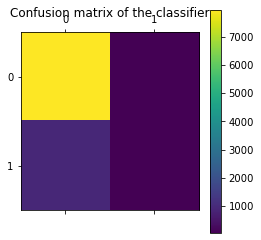

In [259]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [260]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

          no       0.89      0.99      0.94      8027
         yes       0.48      0.06      0.11      1016

    accuracy                           0.89      9043
   macro avg       0.68      0.53      0.52      9043
weighted avg       0.85      0.89      0.85      9043



- Classification report shows the precision, recall, F1 and support scores for the LR classification model.

- Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 89%.
- Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 99% correctly that they would decline the offer.

## Feature Selection

In [263]:
from sklearn.model_selection import GridSearchCV
rfm_parameters = {'n_estimators': [80,90,100]}
rfm_gsmodel = GridSearchCV(estimator=RandomForestClassifier(oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10), param_grid = rfm_parameters)
rfm_gsmodel_result = rfm_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (rfm_gsmodel_result.best_score_, rfm_gsmodel_result.best_params_))
print('mean_test_score : %s' % (rfm_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (rfm_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(rfm_gsmodel_result.cv_results_['params']))

Best: 0.881470 using {'n_estimators': 100}
mean_test_score : [0.88124857 0.88138679 0.88146974]
std_test_Score : [0.00136421 0.00147643 0.00147026]
params: [{'n_estimators': 80}, {'n_estimators': 90}, {'n_estimators': 100}]


In [264]:
rfm_gsmodel_result.best_estimator_

RandomForestClassifier(max_features=None, min_samples_leaf=10, n_jobs=1,
                       oob_score=True, random_state=42)

## Conclusion

- Logistic Regression Model Performance is better than Random Forest Model.
- Duration has a huge impact on the outcome. 
- The more the customer is engaged, the more the probability he/she would make a deposit.
- The state of the country's economy plays a huge role. 
- The better the economy the more willing are customers to make a deposit. So campaigns should be targeted during this period. October being one of the bad months with highest fluctuations in the economic status of country, campaigns in such months should be avoided.
- People in blue-collor jobs, admins, technitians are more probable to make a deposit.
- Customers with good background education are more likely to do well financially and would have the mind set to save. 
- University degree or higher degree holders are more likely to deposit.